## Repaso bibliotecas Numpy, Pandas, Matplotlib y Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2><font color="blue">Ejercicio 1</font></h2>

Cree una distribución uniforme y una distribución gaussiana univariadas y grafíquelas usando histogramas.

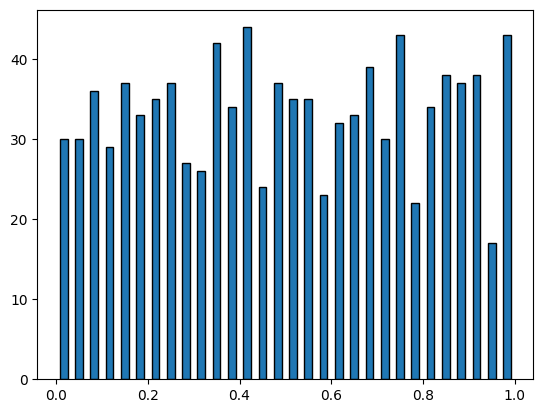

In [2]:
datos = np.zeros(5000)
#distribucion uniforme
uniforme = np.random.rand(1000)
#distribucion gaussiana univariadas
univariada = np.random.randn(1000)
#dos graficos difernetes
_ = plt.hist(uniforme, bins = 30, edgecolor = 'k', rwidth=0.5) #rwidth menor a 1

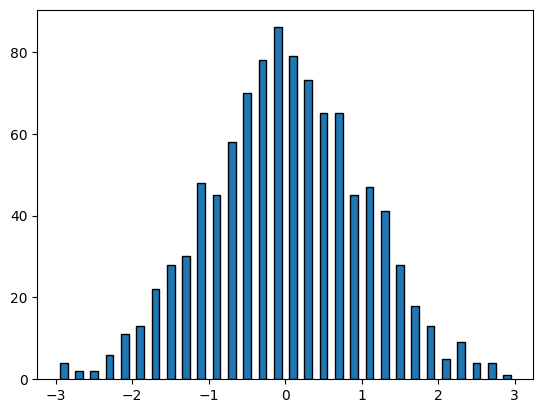

In [3]:
_ = plt.hist(univariada, bins = 30, edgecolor = 'k', rwidth=0.5) #rwidth menor a 1

<h2><font color="blue">Ejercicio 2</font></h2>

Cargue los datos del archivo "datos.csv" de la carpeta `data`, analice los valores de la columna dataset para separar los datos en 4 grupos y grafíquelos usando scatterplot y subplots.

In [4]:
datos = pd.read_csv("../data/datos.csv", index_col=0)

In [5]:
G1 = datos.loc["I"]
G2 = datos.loc["II"]
G3 = datos.loc["III"]
G4 = datos.loc["IV"]

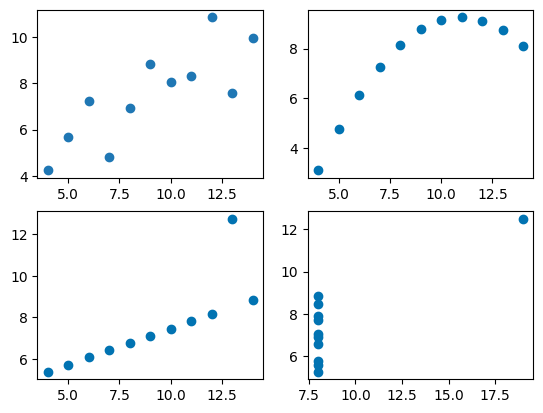

In [6]:
pal = sns.color_palette("colorblind")

plt.subplot(2, 2, 1)
sns.set_palette(pal)  # Configura la paleta de colores
plt.scatter(x=G1['x'], y=G1['y'])
plt.subplot(2, 2, 2)
sns.set_palette(pal)
plt.scatter(x=G2['x'], y=G2['y'])
plt.subplot(2, 2, 3)
sns.set_palette(pal)
plt.scatter(x=G3['x'], y=G3['y'])
plt.subplot(2, 2, 4)
sns.set_palette(pal)
plt.scatter(x=G4['x'], y=G4['y'])

plt.show()



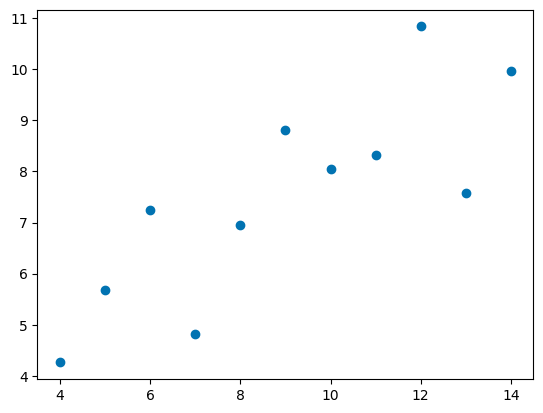

In [7]:
plt.scatter(x = G1["x"], y = G1["y"])


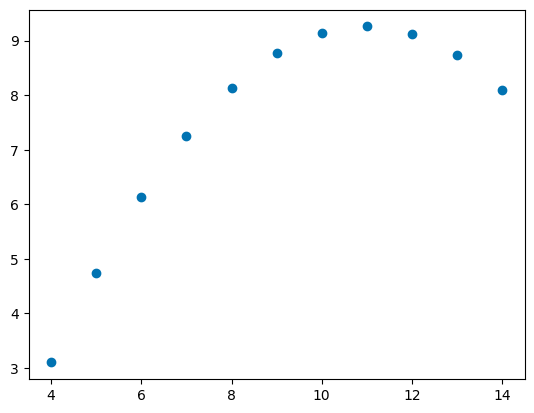

In [8]:
_ = plt.scatter(x = G2["x"], y = G2["y"])


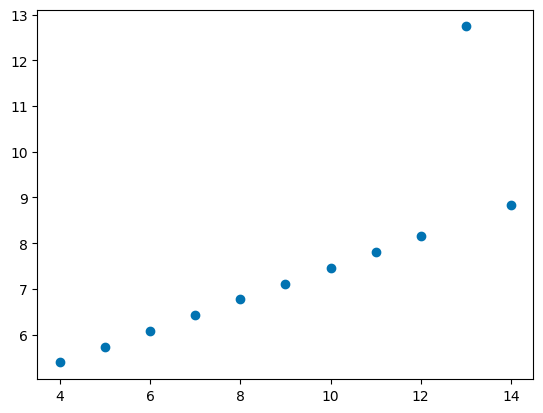

In [9]:
_ = plt.scatter(x = G3["x"], y = G3["y"])

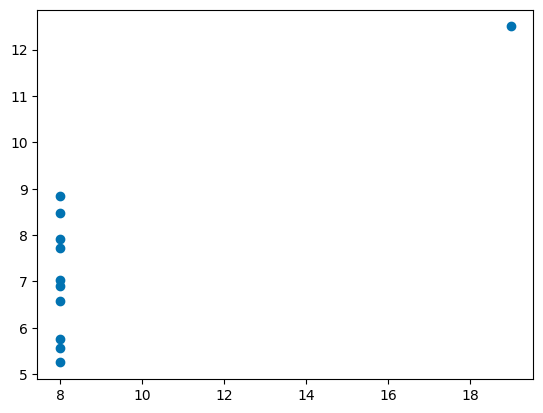

In [10]:
_ = plt.scatter(x = G4["x"], y = G4["y"])

<h2><font color="blue">Ejercicio 3</font></h2>

Escriba el código para generar dos matrices $\mathbf{M_1}$ y $\mathbf{M_2}$, de tamaño $[N\times M]$. Luego, reemplace los valores de $\mathbf{M_1}$ que sean mayores a los correspondientes de $\mathbf{M_2}$ (es decir, para cada posición de la matriz) por el valor $0$. Concatene este resultado a $\mathbf{M_2}$ para obtener una matriz $[2N\times M]$. Verifique el funcionamiento del código con algunos ejemplos, mostrando por pantalla la matriz resultante y su dimensión.
    
Ejemplo: si $\mathbf{M_1}=\begin{bmatrix}1 & 5 & 5\\ 5 & 8 & 7\end{bmatrix}$ y $\mathbf{M_2}=\begin{bmatrix}1 & 2 & 4\\ 5 & 6 & 7\end{bmatrix}$, la salida deberá ser $\mathbf{R}=\begin{bmatrix}1 & 0 & 0\\ 5 & 0 & 7\\1 & 2 & 4\\ 5 & 6 & 7\end{bmatrix}$  

In [11]:
#defino una funcion
def reemplazoDeValores(M1, M2):
    reemplazarM1 = np.where(M1 > M2, 0, M1) #reemplaza en M1 los valores que sean mayores a M2 por cero
    matrizResultante  = np.vstack((M2, reemplazarM1)) #matriz de 2NxM
    return matrizResultante

N,M = 2,3

#genero matrices con valores aleatorios
M1 = np.random.randint(0,20, size = (N, M))
M2 = np.random.randint(0,20, size = (N, M))
print(M1)
print(M2)

pruebaFuncion = reemplazoDeValores(M1, M2)
print(pruebaFuncion)

[[14  7  6]
 [10 19  5]]
[[ 2 14  8]
 [ 4 17  4]]
[[ 2 14  8]
 [ 4 17  4]
 [ 0  7  6]
 [ 0  0  0]]


<h2><font color="blue">Ejercicio 4</font></h2>

Cargue los datos contenidos en el archivo "data_corrupted.csv" a un dataframe. Como el nombre lo indica, algunos datos pueden estar corruptos. Renombre las columnas del dataframe para que tengan los nombres "col1" y "col2". Encuentre el valor medio y desvío estándar de cada columna. Corrobore los resultados usando el método `describe`.

In [12]:
corrupted = pd.read_csv('../data/data_corrupted.csv', header = None) #si no tiene nombres de columnas, uso header

In [13]:
corrupted.rename(columns={'0': 'columna1', '1': 'columna2'}, inplace=True)
corrupted

,0,1
0,0.832933,0.385339
1,0.746570,NaN
2,0.997657,0.809662
3,NaN,0.836019
4,0.234090,0.824775
5,0.197682,0.130571
6,NaN,0.625296
7,NaN,NaN
8,0.934937,0.903386
9,0.410194,0.551462


In [ ]:
#VALOR MEDIO
promedio_col1 = corrupted['0'].mean()
print("Promedio de columna1:", round(promedio_col1, 4))

promedio_col2 = corrupted['1'].mean()
print("Promedio de columna 2: ", round(promedio_col2, 4))

#DESVIO ESTANDAR
desv_est_col1 = corrupted['0'].std()
print("Desvío Estandar de columna 1: ", round(desv_est_col1, 4))

desv_est_col2 = corrupted['1'].std()
print("Desvío Estandar de columna 2: ", round(desv_est_col2, 4))

<h2><font color="blue">Ejercicio 5</font></h2>

Los archivos **iris-setosa.csv**, **iris-versicolor.csv** e **iris-virginica.csv** contienen la información del conjunto de datos <font face="Courier" size=3><b>iris</b></font> separados por clases (ver descripción en el archivo **iris.rst**).
    
1. Construya el conjunto de datos iris a partir de estos tres archivos.
Luego, reemplace en la columna <font face="Courier" size=3><b>class</b></font> los valores numéricos por el nombre correspondiente a la clase. Guarde el conjunto de datos en un único archivo CSV "iris.csv", incorporando estas modificaciones.


In [16]:
setosa = pd.read_csv('../data/iris-setosa.csv')
versicolor = pd.read_csv('../data/iris-versicolor.csv')
virginica = pd.read_csv('../data/iris-virginica.csv')

In [17]:
# Agrego las clases a cada dataframe
setosa['class'] = 'setosa'
versicolor['class'] = 'versicolor'
virginica['class'] = 'virginica'

# Concateno los DataFrames en un solo DataFrame 'iris'
iris = pd.concat([setosa, versicolor, virginica], ignore_index=True)

# Verifico que la columna 'class' tenga los valores setosa, versicolor y virginica
# unique() para obtener los nombres únicos
unicos = iris['class'].unique().tolist()
print(unicos)
#escribir el archivo en un CSV
iris.to_csv('../data/iris.csv', index=False)  # El parámetro index=False evita escribir el índice en el archivo

['setosa', 'versicolor', 'virginica']


2. Obtenga la media y desvio de cada atributo y compárelos con las mostradas en el archivo **iris.rst**, cree un dataframe de 2 columnas con estos datos

In [18]:
#MEDIA
a1 = iris['sepal_length'].mean()
a2 = iris['sepal_width'].mean()
a3 = iris['petal_length'].mean()
a4 = iris['petal_width'].mean()
medias = [a1,a2,a3,a4]
#DESVIO
b1 = iris['sepal_length'].std()
b2 = iris['sepal_width'].std()
b3 = iris['petal_length'].std()
b4 = iris['petal_width'].std()
desvio = [b1,b2,b3,b4]

estad = pd.DataFrame()
estad["medias"] = medias
estad["desvios"] = desvio
print(estad)

     medias   desvios
0  5.843333  0.828066
1  3.057333  0.435866
2  3.758000  1.765298
3  1.199333  0.762238


<h2><font color="blue">Ejercicio 6</font></h2>

Grafique la siguiente recta junto con el texto como se muestra en la figura y muestre por consola su pendiente.


<img src="https://drive.google.com/uc?export=view&id=1HLm6NpD4lenot5LR2BXI4SUDJbjCrZXR" width = 450>

pendiente =  0.5


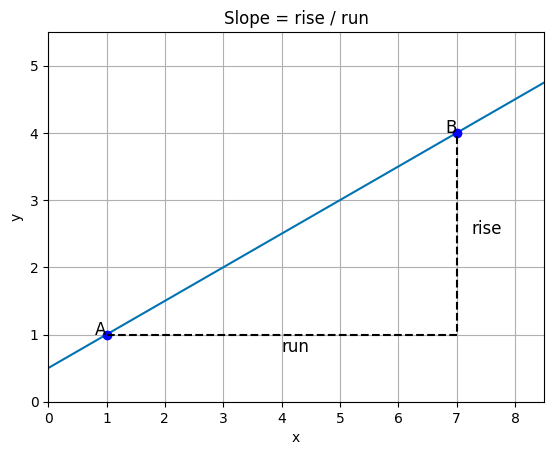

In [19]:
m = 1/2
x = np.linspace(0, 9, 30) #30 puntos entre 0 y 9
y = m*x+1/2
p1x, p1y, p2x, p2y = 1,1,7,4

#grafico
plt.plot(x, y, p1x, p1y, "bo", p2x, p2y, "bo") #bo = blue circle
plt.axis([0, 8.5, 0, 5.5]) #limites de los ejesº
plt.grid(True)
plt.title("Slope = rise / run")
plt.xlabel("x")
plt.ylabel("y")
plt.text(p1x, p1y, "A", ha="right", size= 12, weight= "light") #nombre primer interseccion
plt.text(p2x, p2y, "B", ha="right", size= 12, weight= "light") #nombre segunda interseccion

plt.plot([p1x, 7, p2x], [p1y, 1, p2y], "k--") #k-- = linea punteada negra
plt.text(7 + 0.25, 2.5, "rise", ha="left", size= 12, weight= "light") #nombre rise
plt.text(4, 1 - 0.25, "run", ha="left", size= 12, weight= "light") #nombre run

plt.show

print("pendiente = ", m)

<h2><font color="blue">Ejercicio 7</font></h2>


Cargue el conjunto de datos del archivo <b>iris.csv</b> que creó y grafique en tres histogramas la distribución de los anchos de sépalos (`sepal_width`) para cada especie de flor. Además, haga una cuarta  gráfica con los tres histogramas solapados.


<b>Figura de referencia:</b>

<div style="width:680px;margin-left: auto;margin-right: auto;">
  <img src="https://drive.google.com/uc?id=1mT_PNPqugXDyJSkNoIb1O3FxR_NzY9j7">
</div>

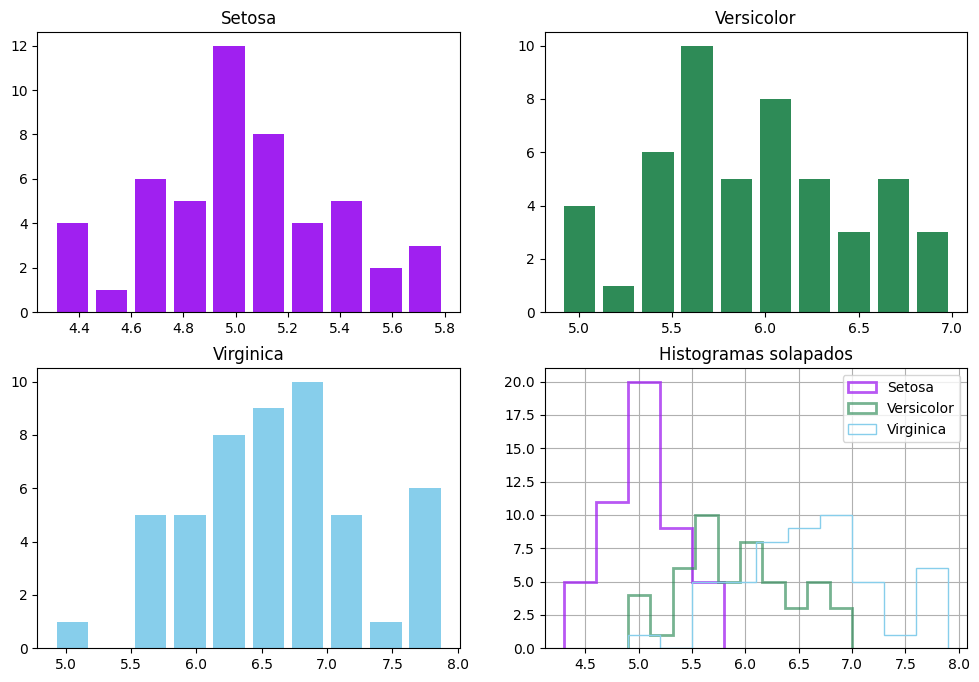

In [23]:
#HISTOGRAMAS
#setosa
fig = plt.figure(figsize=(12, 8))

plt.subplot(2,2,1)
plt.hist(setosa['sepal_length'], rwidth = 0.8, color = "#A020F0")
plt.title('Setosa')
#versicolor
plt.subplot(2,2,2)
plt.hist(versicolor['sepal_length'],rwidth = 0.8, color = '#2E8B57')
plt.title("Versicolor")
#virginica
plt.subplot(2,2,3)
plt.hist(virginica['sepal_length'],rwidth = 0.8, color = "#87CEEB")
plt.title("Virginica")

#solapado
plt.subplot(2,2,4)
plt.hist(setosa['sepal_length'], bins=5, color='#A020F0', alpha=0.75, histtype='step',  # default type
         label='Setosa', linewidth = 2)
plt.hist(versicolor['sepal_length'], color='#2E8B57', alpha=0.65, histtype='step',
         label='Versicolor', linewidth = 2)
plt.hist(virginica['sepal_length'], color='#87CEEB', histtype='step', label='Virginica')
plt.title ("Histogramas solapados")

plt.legend()
plt.grid(True)
plt.show() #hace que se muestren los gráficos. Si hago subplots tiene que haber uno solo al final

<h2><font color="blue">Ejercicio 8</font></h2>
    
Cargue en un `DataFrame` el conjunto de datos sobre películas dado en **imdb_1000.csv**. A partir de procesar estos datos responda a los siguientes enunciados.



In [24]:
peliculas = pd.read_csv('../data/imdb_1000.csv')
peliculas.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."



    
**1.** Calcule la duración media de las películas


In [25]:
round(peliculas['duration'].mean(),0)
#La duracion media de las peliculas es de 121 minutos

121.0

**2.** Encuentre las 5 películas más cortas y las 3 más largas. Muestre como resultado título y duración de cada pelicula.


In [26]:
# Ordenar el DataFrame de menor a mayor según la columna "columna_ordenar"
peliculasAscendente = peliculas.sort_values(by = 'duration', ascending=True)
Cortas = peliculasAscendente[['title','duration']].head().reset_index(drop = True)
print("5 peliculas mas cortas", Cortas)
print("-------------")
# Ordenar el DataFrame de menor a mayor según la columna "columna_ordenar"
peliculasDescendente = peliculas.sort_values(by = 'duration', ascending = False)
Largas = peliculasDescendente[['title','duration']].head(3).reset_index(drop = True)
print("3 peliculas mas largas", Largas)

5 peliculas mas cortas                          title  duration
0                       Freaks        64
1          Battleship Potemkin        66
2  The Cabinet of Dr. Caligari        67
3                    Duck Soup        68
4                      The Kid        68
-------------
3 peliculas mas largas                          title  duration
0                       Hamlet       242
1           Gone with the Wind       238
2  Once Upon a Time in America       229



**3.** Grafique con boxplots la duración de las películas, separándolas por género.



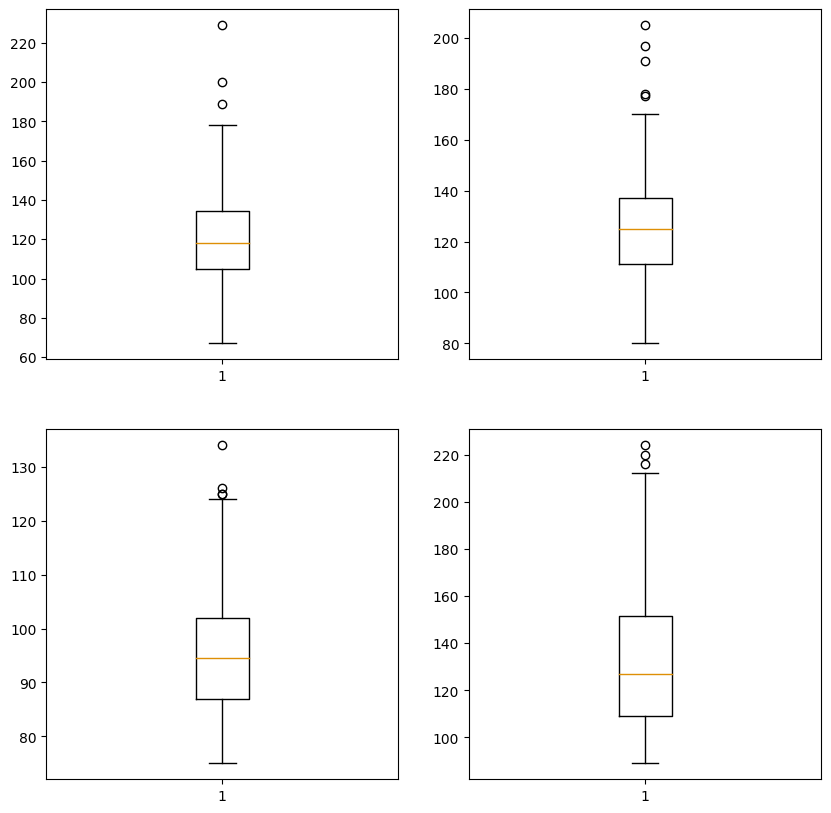

In [27]:
crimen = peliculas[peliculas['genre'] == 'Crime']
accion = peliculas[peliculas['genre'] == 'Action']
animacion = peliculas[peliculas['genre'] == 'Animation']
aventuras = peliculas[peliculas['genre'] == 'Adventure']

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.boxplot(crimen['duration'])
plt.subplot(2,2,2)
plt.boxplot(accion['duration'])
plt.subplot(2,2,3)
plt.boxplot(animacion['duration'])
plt.subplot(2,2,4)
plt.boxplot(aventuras['duration'])

plt.show()

**4.** Grafique con barras la cantidad de películas, separándolas por clasificación de contenido.



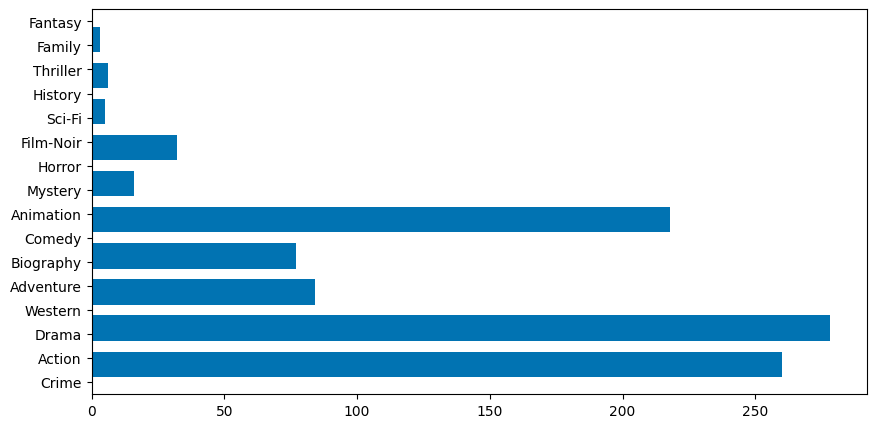

In [28]:
plt.figure(figsize=(10, 5))

plt.hist(peliculas['genre'], rwidth = 0.7, orientation = 'horizontal')
plt.show()

**5.** Encuentre la película con mayor puntaje para cada género y muestre en un `DataFrame` el resultado. Indique género, título y puntaje.

In [29]:
mayorPuntaje = peliculas['star_rating'].max()
resultado = peliculas.loc[peliculas['star_rating'] == mayorPuntaje]
resultado = resultado[['genre','title','star_rating']]
print(resultado)

   genre                     title  star_rating
0  Crime  The Shawshank Redemption          9.3
